 <font size="+4" color='#053c96'><b> Anemia análisis </b></font>

La base de datos agrupa los resultados de distintos análisis de sangre a pacientes de los cuales se busca inferir la presencia de anemia. 


# Objetivo:
Usando técnicas de machine learning se busca determinar un modelo que permita predecir si un paciente presenta o no anemia basado en su análisis de sangre.

In [4]:
import pandas as pd
import os
import warnings 
warnings.filterwarnings('ignore')

In [12]:
os.chdir('C:/Users/User/Desktop/anemia')

In [38]:
#Cargando la base de datos

df = pd.read_excel('anemi.xlsx', decimal=',')

In [39]:
df.head()

,Record,RBC,HGB,HCT,MCV,MCH,MCHC,SONU‚
0,1,13.10,4.60,38.80,84.20,28.40,33.80,no
1,2,4.24,6.62,23.72,55.92,15.62,27.82,yes
2,3,4.06,7.02,24.62,60.62,17.22,28.52,yes
3,4,2.00,7.30,21.80,6.90,35.80,33.50,yes
4,5,3.12,7.32,23.62,75.62,23.42,30.92,yes


In [40]:
#dimensión de la base de datos
print('Número de filas:{}'.format(df.shape[0]))
print('Número de columnas:{}'.format(df.shape[1]))

Número de filas:1732
Número de columnas:8


In [41]:
#buscando missings values
df.isna().sum()

Record    0
RBC       0
HGB       0
HCT       0
MCV       0
MCH       0
MCHC      0
SONU‚     0
dtype: int64

In [42]:
df.dtypes

Record      int64
RBC       float64
HGB       float64
HCT       float64
MCV       float64
MCH       float64
MCHC      float64
SONU‚      object
dtype: object

In [45]:
#la columna 'record' no sirve para los propositos de la investigación 
df.drop(['Record'],axis = 1, inplace=True)

 # Exloratory data analysis

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

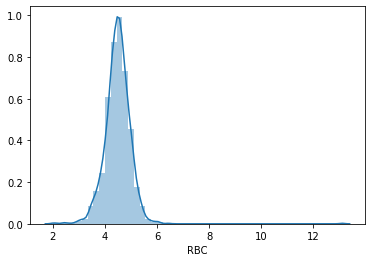

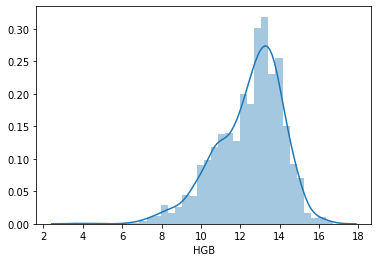

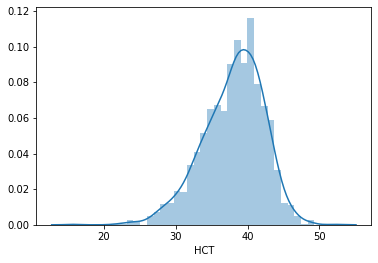

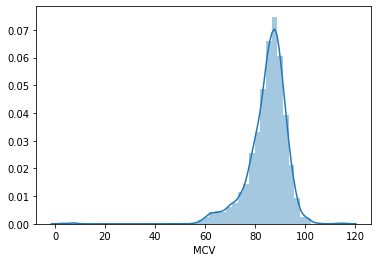

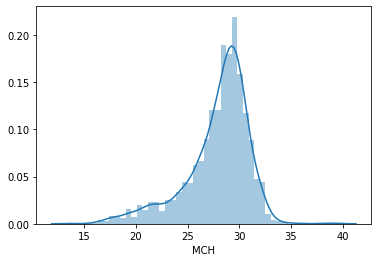

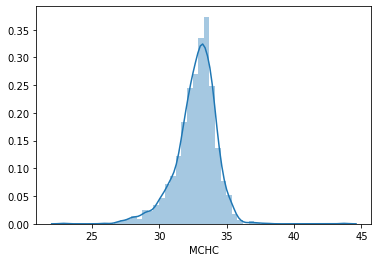

In [47]:
for i  in df.columns[0:-1]:
    sns.distplot(df[i])
    plt.show()

La mayoría de las variables cuenta con una distribucion en forma de campana


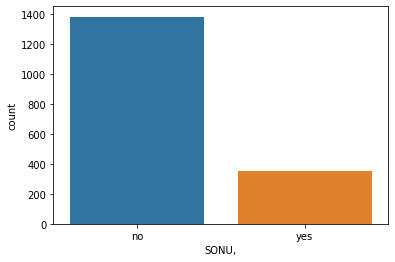

In [56]:
sns.countplot(df['SONU‚'])

# Modelamiento

Se usaran los algoritmos:
    - SVM
    - LogisticRegression
    -DecissionTree
    -Random Forest
    -Multinomial naive bayes
    Gaussian naive bayes

In [53]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

In [54]:
from sklearn.model_selection import train_test_split

In [57]:
df['SONU‚']=df['SONU‚'].apply(lambda x: 1 if x == 'yes' else 0)

In [59]:
df = df.rename(columns = {'SONU‚': 'Anemia'})

Para evaluar cada modelo se usara el paquete GridSearchCV en el cual se podra efectuar los diferentes modelos y cambios en los parametros de cada modelo, asi como una validación cruzada del train test

In [65]:
from sklearn.model_selection import GridSearchCV

In [82]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [10,30,50]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'naive_bayes_gaussian': {
        'model': GaussianNB(),
        'params': {}
    },
    'naive_bayes_multinomial': {
        'model': MultinomialNB(),
        'params': {}
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy'],
            
        }
    }     
}

In [83]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(df.drop(['Anemia'],axis=1), df.Anemia)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
results= pd.DataFrame(scores,columns=['model','best_score','best_params'])
results

,model,best_score,best_params
0,svm,0.986143,"{'C': 1, 'kernel': 'linear'}"
1,random_forest,0.992494,{'n_estimators': 10}
2,logistic_regression,0.975173,{'C': 10}
3,naive_bayes_gaussian,0.934180,{}
4,naive_bayes_multinomial,0.800808,{}
5,decision_tree,0.987875,{'criterion': 'gini'}


Según los resultados, el mejor modelo es RandomForest con  una precisión de 0.993072, lo cual es altamente preciso

Teniendo estos resultados se puede guardar este modelo para futuras referencias 